Initial cost: [29.59559685]

Final cost: [13.69094522]

Final weights and biases:
Wu: [[ 0.08159339 -0.68622434 -0.11742454]]
bu: [[ 0.27116171 -0.37917983 -0.00759286]]
Wy:
 [[1.32598667]
 [7.76211242]
 [3.33274683]]
by: [[0.39333115]]

Final predictions:
[[5.95965231]
 [3.3567872 ]
 [1.96943647]]


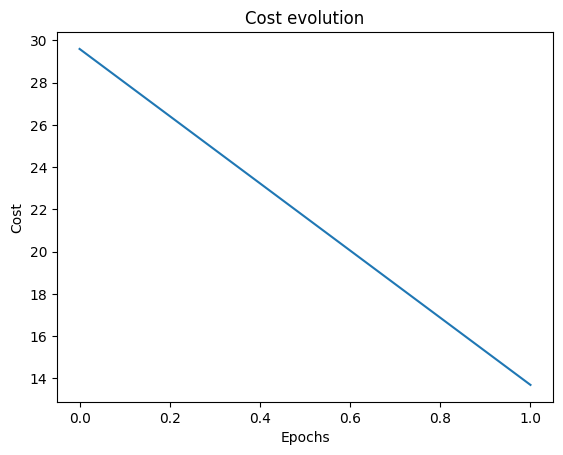

In [1]:
import pickle
from math import e

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit


# Sigmoid function
def sigmoid(x):
    return expit(x)


# Train Lambert model
def train_lambert(X, Y, epochs):
    m = X.shape[0]
    mf = 0.5
    lr = 0.01

    Wu = np.array([[0.15, -0.10, 0.12]])
    bu = np.array([[0.3, -0.2, 0.07]])

    Wy = np.array([[1.4], [7.8], [3.4]])

    by = np.array([[0.5]])

    # Costs
    fs = np.zeros((epochs + 1, 1))

    # Momentum terms
    Wu_m = np.zeros_like(Wu)
    bu_m = np.zeros_like(bu)
    Wy_m = np.zeros_like(Wy)
    by_m = np.zeros_like(by)

    for i in range(epochs):
        # Forward pass
        V_3 = Wu
        V_2 = bu
        V_1 = Wy
        V0 = by
        V1 = X @ V_3 + np.ones((m, 1)) @ V_2
        V2 = sigmoid(V1)
        V3 = V2 @ V_1 + np.ones((m, 1)) @ V0
        V4 = (1 / m) * ((Y - V3).T @ (Y - V3))
        fs[i] = V4

        # Backward pass
        # V4_ = 1
        V3_ = -2 / m * (Y - V3)
        V2_ = V3_ @ V_1.T
        V1_ = V2_ * V2 * (np.ones((V2.shape[0], V2.shape[1])) - V2)
        V0_ = np.ones((m, 1)).T @ V3_
        V_1_ = V2.T @ V3_
        V_2_ = np.ones((m, 1)).T @ V1_
        V_3_ = X.T @ V1_

        # Update weights and biases (first time without momentum)
        if i == 0:
            beta = 0
        elif i == 1:
            beta = mf

        Wu_m = beta * Wu_m + (1 - beta) * V_3_
        bu_m = beta * bu_m + (1 - beta) * V_2_
        Wy_m = beta * Wy_m + (1 - beta) * V_1_
        by_m = beta * by_m + (1 - beta) * V0_

        Wu -= lr * Wu_m
        bu -= lr * bu_m
        Wy -= lr * Wy_m
        by -= lr * by_m

    # Forward pass to get cost of last weights and biases
    V_3 = Wu
    V_2 = bu
    V_1 = Wy
    V0 = by
    V1 = X @ V_3 + np.ones((m, 1)) @ V_2
    V2 = sigmoid(V1)
    V3 = V2 @ V_1 + np.ones((m, 1)) @ V0
    V4 = (1 / m) * ((Y - V3).T @ (Y - V3))
    fs[epochs] = V4

    return Wu, bu, Wy, by, fs


def lambert(X):
    # Load weights and biases
    with open("lambert_model.pkl", "rb") as f:
        weights = pickle.load(f)
    Wu, bu, Wy, by = weights["Wu"], weights["bu"], weights["Wy"], weights["by"]

    layer1 = X @ Wu + np.ones((X.shape[0], 1)) @ bu
    layer2 = sigmoid(layer1)
    layer3 = layer2 @ Wy + np.ones((X.shape[0], 1)) @ by

    return layer3


def main():
    # Input data
    X = np.array([[0 * e**0], [1 * e**1], [2 * e**2]])

    Y = np.array([[0], [1], [2]])

    # Hyperparameters
    epochs = 1

    Wu, bu, Wy, by, fs = train_lambert(X, Y, epochs)
    print("Initial cost:", fs[0])
    print("\nFinal cost:", fs[-1])
    print("\nFinal weights and biases:")
    print("Wu:", Wu)
    print("bu:", bu)
    print("Wy:\n", Wy)
    print("by:", by)
    print("\nFinal predictions:")
    print(lambert(X))

    # Plot cost
    plt.plot(range(epochs + 1), fs)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title("Cost evolution")
    plt.show()

    # Save weights and biases
    with open("lambert_model.pkl", "wb") as f:
        pickle.dump({"Wu": Wu, "bu": bu, "Wy": Wy, "by": by}, f)


if __name__ == "__main__":
    main()
